## Basic principles behind flow, geochemical, and transport modelling

### Flow Modelling Example: 1D Steady-State Groundwater Flow

This example solves the steady-state 1D groundwater flow equation using a finite-difference method. In a homogeneous aquifer with constant hydraulic conductivity (K) and a uniform recharge rate (N). The code sets up and solves the linear system to obtain the hydraulic head distribution.

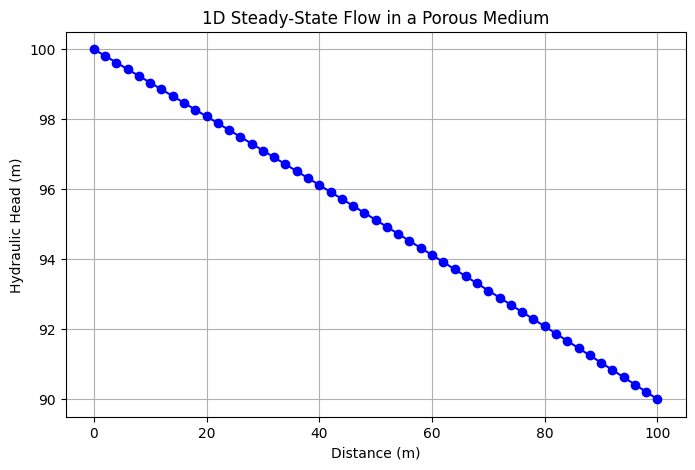

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Domain parameters
L = 100.0                # Domain length in meters
nx = 51                  # Number of grid points
dx = L / (nx - 1)        # Spatial step

# Physical parameters
K = 10.0                 # Hydraulic conductivity (m/day)
N = 0.001                # Uniform recharge rate (m/day)

# Boundary conditions (Dirichlet)
H0 = 100.0               # Head at x=0 (m)
HL = 90.0                # Head at x=L (m)

# Spatial grid
x = np.linspace(0, L, nx)

# Set up the coefficient matrix A and right-hand side vector b.
# For interior nodes, we discretize using central differences:
# K*(H[i-1] - 2H[i] + H[i+1]) / dx^2 = -N.
A = np.zeros((nx, nx))
b = np.zeros(nx)

# Apply boundary conditions
A[0, 0] = 1.0
b[0] = H0
A[-1, -1] = 1.0
b[-1] = HL

# Build the system for interior nodes
for i in range(1, nx-1):
    A[i, i-1] = K / dx**2
    A[i, i]   = -2 * K / dx**2
    A[i, i+1] = K / dx**2
    b[i] = -N

# Solve the linear system
H = np.linalg.solve(A, b)

# Plot the hydraulic head distribution
plt.figure(figsize=(8, 5))
plt.plot(x, H, marker='o', linestyle='-', color='blue')
plt.xlabel("Distance (m)")
plt.ylabel("Hydraulic Head (m)")
plt.title("1D Steady-State Flow in a Porous Medium")
plt.grid(True)
plt.show()



### Geochemical Modelling Example: Kinetics of Calcite Dissolution


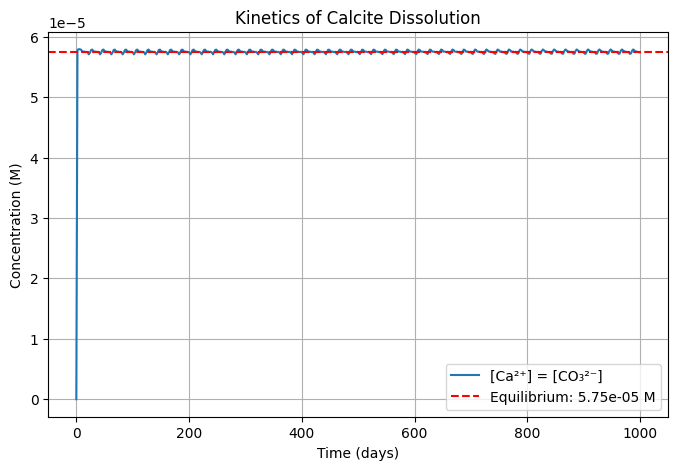

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Define parameters for calcite dissolution
Ksp = 10**(-8.48)  # Solubility product of calcite (mol^2/L^2)
k = 1e-3          # Rate constant (1/day)

def calcite_ode(t, C):
    """ODE for calcite dissolution assuming [Ca^2+] = [CO3^2-] = C."""
    return k * (1 - (C**2 / Ksp))

# Time span for the simulation (days)
t_span = (0, 1000)
# Initial concentration (mol/L)
C0 = [0.0]

# Solve the ODE using solve_ivp
t_eval = np.linspace(t_span[0], t_span[1], 500)
sol = solve_ivp(calcite_ode, t_span, C0, t_eval=t_eval)

# Equilibrium concentration (when reaction driving force is zero)
C_eq = np.sqrt(Ksp)

plt.figure(figsize=(8, 5))
plt.plot(sol.t, sol.y[0], label="[Ca²⁺] = [CO₃²⁻]")
plt.axhline(C_eq, color='r', linestyle='--', label=f"Equilibrium: {C_eq:.2e} M")
plt.xlabel("Time (days)")
plt.ylabel("Concentration (M)")
plt.title("Kinetics of Calcite Dissolution")
plt.legend()
plt.grid(True)
plt.show()


### Transport Modelling Example: 1D Advection–Dispersion of a Contaminant Pulse

This example numerically solves the one-dimensional advection–dispersion equation for a contaminant pulse using an explicit finite-difference scheme. The governing equation combines advection (movement with the bulk flow) and dispersion (spreading due to mixing).

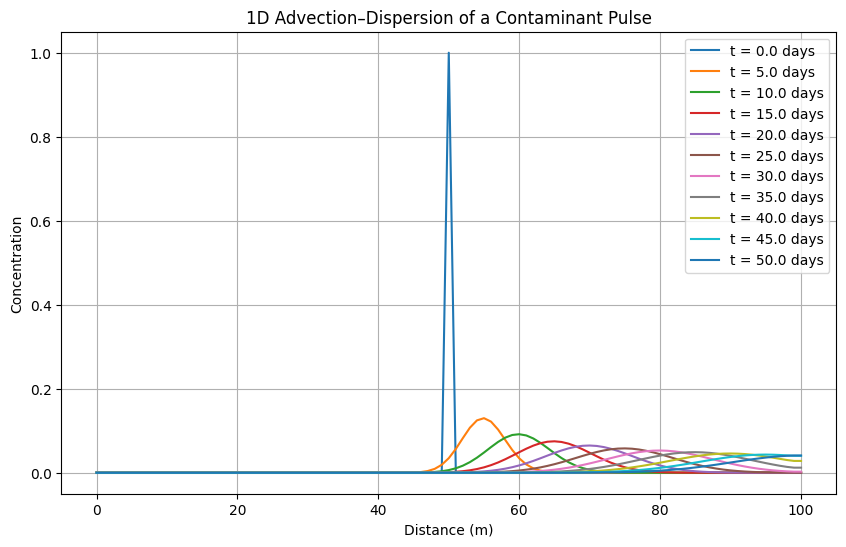

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Domain and grid parameters
L = 100.0             # Domain length (meters)
nx = 101              # Number of spatial grid points
dx = L / (nx - 1)     # Spatial step size
x = np.linspace(0, L, nx)

# Time parameters
t_final = 50.0        # Total simulation time (days)
dt = 0.1              # Time step (days)
nt = int(t_final / dt)

# Physical parameters
v = 1.0   # Advection velocity (m/day)
D = 0.5   # Dispersion coefficient (m^2/day)

# Initial condition: a pulse at the center of the domain
C = np.zeros(nx)
C[int(nx/2)] = 1.0  # Initial concentration

# Arrays to store concentration profiles for plotting
C_profiles = [C.copy()]
time_points = [0.0]

# Time-stepping loop using an explicit finite-difference scheme:
# Upwind difference for advection and central difference for dispersion.
for n in range(1, nt+1):
    C_new = C.copy()
    for i in range(1, nx-1):
        advective_flux = -v * (C[i] - C[i-1]) / dx
        dispersive_flux = D * (C[i+1] - 2*C[i] + C[i-1]) / dx**2
        C_new[i] = C[i] + dt * (advective_flux + dispersive_flux)
    
    # Apply zero-gradient (Neumann) boundary conditions
    C_new[0] = C_new[1]
    C_new[-1] = C_new[-2]
    
    C = C_new.copy()
    
    # Store the profile every 50 time steps for plotting
    if n % 50 == 0:
        C_profiles.append(C.copy())
        time_points.append(n * dt)

# Plot the concentration profiles
plt.figure(figsize=(10, 6))
for t, profile in zip(time_points, C_profiles):
    plt.plot(x, profile, label=f"t = {t:.1f} days")
plt.xlabel("Distance (m)")
plt.ylabel("Concentration")
plt.title("1D Advection–Dispersion of a Contaminant Pulse")
plt.legend()
plt.grid(True)
plt.show()
